# Compare to alternative models

In [3]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow, BayesRegression, LMERegression, BayesConditions

In [4]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

## Bayesian

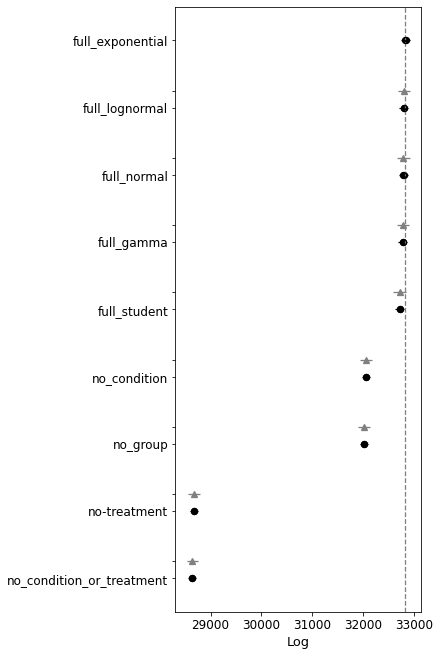

rank           loo      p_loo        d_loo  \
full_exponential              0  32828.062178  10.130072     0.000000   
full_lognormal                1  32796.773767  10.074282    31.288412   
full_normal                   2  32789.329774  10.209585    38.732404   
full_gamma                    3  32774.758427  10.071718    53.303751   
full_student                  4  32713.285916   9.951363   114.776262   
no_condition                  5  32059.408070   3.461760   768.654109   
no_group                      6  32017.948075   3.310025   810.114103   
no-treatment                  7  28679.234768   2.005346  4148.827410   
no_condition_or_treatment     8  28642.456469   2.039860  4185.605709   

                             weight         se         dse  warning loo_scale  
full_exponential           0.215642  84.046333    0.000000    False       log  
full_lognormal             0.213029  87.146987  120.939881    False       log  
full_normal                0.194604  85.563650  119.631260    False       log  
full_gamma                 0.198799  84.159242  118.810871    False       log  
full_student               0.178041  86.120049  120.152971    False       log  
no_condition               0.000054  81.847853  117.245770    False       log  
no_group                   0.000054  82.771409  117.612882    False       log  
no-treatment               0.000016  74.302598  112.083275    False       log  
no_condition_or_treatment  0.000000  76.371227  113.845165    False       log

In [3]:
window = BayesRegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

## Linear mixed effects model

In [5]:
window = LMERegression(df=df, y='isi', treatment='stim', group='mouse', condition='neuron_x_mouse')
window.fit()
window.fit_anova()
window.posterior

Using formula isi ~ (1|mouse) + stim| neuron_x_mouse__0 + stim|neuron_x_mouse__1 + stim|neuron_x_mouse__2 + stim|neuron_x_mouse__3 + stim|neuron_x_mouse__4 + stim|neuron_x_mouse__5 + stim|neuron_x_mouse__6 + stim|neuron_x_mouse__7 + stim|neuron_x_mouse__8 + stim|neuron_x_mouse__9 + stim|neuron_x_mouse__10 + stim|neuron_x_mouse__11 + stim|neuron_x_mouse__12 + stim|neuron_x_mouse__13 + stim|neuron_x_mouse__14 + stim|neuron_x_mouse__15 + stim|neuron_x_mouse__16 + stim|neuron_x_mouse__17 + stim|neuron_x_mouse__18 + stim|neuron_x_mouse__19 + stim|neuron_x_mouse__20 + stim|neuron_x_mouse__21 + stim|neuron_x_mouse__22 + stim|neuron_x_mouse__23 + stim|neuron_x_mouse__24 + stim|neuron_x_mouse__25 + stim|neuron_x_mouse__26 + stim|neuron_x_mouse__27 + stim|neuron_x_mouse__28 + stim|neuron_x_mouse__29 + stim|neuron_x_mouse__30 + stim|neuron_x_mouse__31 + stim|neuron_x_mouse__32 + stim|neuron_x_mouse__33 + stim|neuron_x_mouse__34 + stim|neuron_x_mouse__35 + stim|neuron_x_mouse__36 + stim|neuron_x_m

/home/m/anaconda3/envs/dj/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                            Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept                   0.081    0.004   21.783  0.000   0.074   0.089
1 | mouse                  -0.004    0.001   -4.481  0.000  -0.005  -0.002
stim | neuron_x_mouse__0   -0.002    0.001   -2.621  0.009  -0.004  -0.001
stim | neuron_x_mouse__1   -0.006    0.001   -7.589  0.000  -0.008  -0.005
stim | neuron_x_mouse__2   -0.013    0.001  -15.888  0.000  -0.015  -0.012
...                           ...      ...      ...    ...     ...     ...
stim | neuron_x_mouse__76   0.003    0.001    3.635  0.000   0.001   0.005
stim | neuron_x_mouse__77  -0.001    0.001   -1.750  0.080  -0.003   0.000
stim | neuron_x_mouse__78  -0.004    0.001   -4.968  0.000  -0.006  -0.002
stim | neuron_x_mouse__79  -0.007    0.001   -8.540  0.000  -0.009  -0.005
Group Var                   0.000    0.002                                

[83 rows x 6 columns]
isi~stim
           sum_sq    df      F  PR(>F)
stim         0.0   1.0  52.91

neuron_x_mouse  center interval  Std.Err.       z      p  higher interval  \
0                0           -0.002     0.001  -2.621  0.009           -0.004   
1                1           -0.006     0.001  -7.589  0.000           -0.008   
2                2           -0.013     0.001 -15.888  0.000           -0.015   
3                3           -0.015     0.001 -17.725  0.000           -0.016   
4                4           -0.019     0.001 -23.024  0.000           -0.021   
..             ...              ...       ...     ...    ...              ...   
75              75            0.006     0.001   7.593  0.000            0.005   
76              76            0.003     0.001   3.635  0.000            0.001   
77              77           -0.001     0.001  -1.750  0.080           -0.003   
78              78           -0.004     0.001  -4.968  0.000           -0.006   
79              79           -0.007     0.001  -8.540  0.000           -0.009   

    lower interval  zero  
0           -0.001     0  
1           -0.005     0  
2           -0.012     0  
3           -0.013     0  
4           -0.017     0  
..             ...   ...  
75           0.008     0  
76           0.005     0  
77           0.000     0  
78          -0.002     0  
79          -0.005     0  

[80 rows x 8 columns]

In [6]:
window.plot(x='neuron_x_mouse')

alt.LayerChart(...)

Simple one-way ANOVA:

In [7]:
window.fit_anova()

isi~stim
           sum_sq    df      F  PR(>F)
stim         0.0   1.0  52.91     0.0
Residual     0.0  14.0    NaN     NaN


True

Of course in reality, neurons don't have this consistent variation in each mouse. This would only be applicable to a priori classes of neurons